### Using an unsupervised Learning approach to assess the different groups of loan applicants

### Read CSV File

In [54]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = pd.read_csv("data/SBAnational.csv")


In [55]:
df.columns

Index(['Unnamed: 0', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv'],
      dtype='object')

In [56]:
df.shape

(4000, 28)

### Data Preprocessing 

##### Remove dollar signs from all columns with the function below

In [57]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

##### Keep top 4000 rows

In [58]:
#keep top 4000 rows

df = df[:4000]
df['DisbursementGross'] = df['DisbursementGross'].apply(clean_currency).astype('float')
df['BalanceGross'] = df['BalanceGross'].apply(clean_currency).astype('float')
df['GrAppv'] = df['GrAppv'].apply(clean_currency).astype('float')
df['SBA_Appv'] = df['SBA_Appv'].apply(clean_currency).astype('float')
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(clean_currency).astype('float')


In [59]:
df.head()

Unnamed: 0  LoanNr_ChkDgt                           Name          City  \
0           0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE   
1           1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS   
2           2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON   
3           3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW   
4           4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO   

  State    Zip                           Bank BankState   NAICS ApprovalDate  \
0    IN  47711               FIFTH THIRD BANK        OH  451120    28-Feb-97   
1    IN  46526                1ST SOURCE BANK        IN  722410    28-Feb-97   
2    IN  47401        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97   
3    OK  74012  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97   
4    FL  32801        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97   

   ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  \
0        1997    84      4     2.000          0            0              1   
1        1997    60      2     2.000          0            0              1   
2        1997   180      7     1.000          0            0              1   
3        1997    60      2     1.000          0            0              1   
4        1997   240     14     1.000          7            7              1   

   UrbanRural RevLineCr LowDoc ChgOffDate DisbursementDate  DisbursementGross  \
0           0         N      Y        NaN        28-Feb-99          60000.000   
1           0         N      Y        NaN        31-May-97          40000.000   
2           0         N      N        NaN        31-Dec-97         287000.000   
3           0         N      Y        NaN        30-Jun-97          35000.000   
4           0         N      N        NaN        14-May-97         229000.000   

   BalanceGross MIS_Status  ChgOffPrinGr     GrAppv   SBA_Appv  
0         0.000      P I F         0.000  60000.000  48000.000  
1         0.000      P I F         0.000  40000.000  32000.000  
2         0.000      P I F         0.000 287000.000 215250.000  
3         0.000      P I F         0.000  35000.000  28000.000  
4         0.000      P I F         0.000 229000.000 229000.000

In [60]:
df.shape

(4000, 28)

In [61]:
len(df)

4000

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4000 non-null   int64  
 1   LoanNr_ChkDgt      4000 non-null   int64  
 2   Name               3996 non-null   object 
 3   City               4000 non-null   object 
 4   State              4000 non-null   object 
 5   Zip                4000 non-null   int64  
 6   Bank               3996 non-null   object 
 7   BankState          3996 non-null   object 
 8   NAICS              4000 non-null   int64  
 9   ApprovalDate       4000 non-null   object 
 10  ApprovalFY         4000 non-null   int64  
 11  Term               4000 non-null   int64  
 12  NoEmp              4000 non-null   int64  
 13  NewExist           4000 non-null   float64
 14  CreateJob          4000 non-null   int64  
 15  RetainedJob        4000 non-null   int64  
 16  FranchiseCode      4000 

In [63]:
df.dtypes

Unnamed: 0             int64
LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY             int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross    float64
BalanceGross         float64
MIS_Status            object
ChgOffPrinGr         float64
GrAppv               float64
SBA_Appv             float64
dtype: object

In [64]:
df_num = df.select_dtypes(include='number')
df_num.head()

Unnamed: 0  LoanNr_ChkDgt    Zip   NAICS  ApprovalFY  Term  NoEmp  \
0           0     1000014003  47711  451120        1997    84      4   
1           1     1000024006  46526  722410        1997    60      2   
2           2     1000034009  47401  621210        1997   180      7   
3           3     1000044001  74012       0        1997    60      2   
4           4     1000054004  32801       0        1997   240     14   

   NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
0     2.000          0            0              1           0   
1     2.000          0            0              1           0   
2     1.000          0            0              1           0   
3     1.000          0            0              1           0   
4     1.000          7            7              1           0   

   DisbursementGross  BalanceGross  ChgOffPrinGr     GrAppv   SBA_Appv  
0          60000.000         0.000         0.000  60000.000  48000.000  
1          40000.000         0.000         0.000  40000.000  32000.000  
2         287000.000         0.000         0.000 287000.000 215250.000  
3          35000.000         0.000         0.000  35000.000  28000.000  
4         229000.000         0.000         0.000 229000.000 229000.000

In [65]:
df_num.isna().sum()

Unnamed: 0           0
LoanNr_ChkDgt        0
Zip                  0
NAICS                0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
DisbursementGross    0
BalanceGross         0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [66]:
# Drop null values

#df = df.fillna(df.mean())
df_num = df_num.dropna()


In [67]:
df_num.shape

(4000, 17)

In [68]:
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


### Dimensionality reduction - Finding the optimal number of Principal components

### Rescaling the data and applying PCA

In [69]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_num) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

# Reducing the dimensions of the data 
model = PCA(n_components = 3) 
X_principal = model.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2', 'P3'] 
X_principal.head()


P1     P2     P3
0 0.774 -0.395  0.305
1 0.594 -0.478  0.244
2 0.793 -0.115 -0.187
3 0.870 -0.172 -0.280
4 0.813  0.079 -0.028

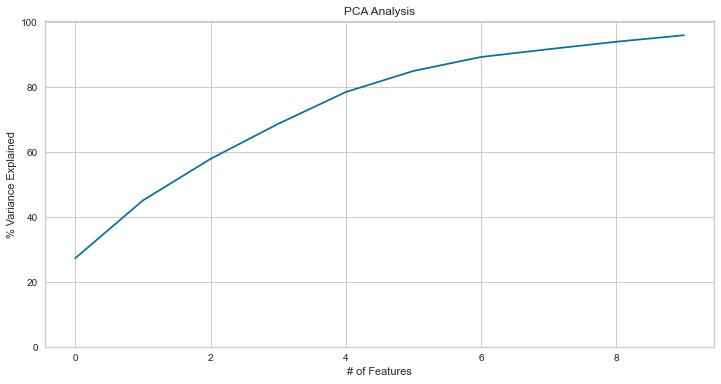

In [70]:
# n_components=10 because we have 10 features in the dataset
pca = PCA(n_components=10)
pca.fit(normalized_df)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

### Using Elbow Method to select optimal number of clusters 

Text(0, 0.5, 'Inertia')

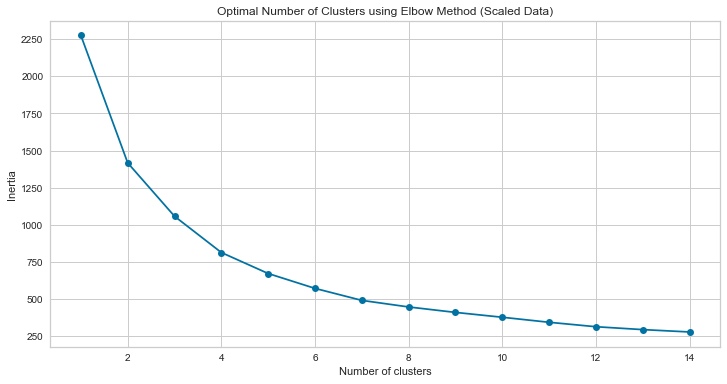

In [71]:
#Using Elbow Method to select optimal number of clusters based on PCA results

sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(X_principal)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.010s...
[t-SNE] Computed neighbors for 4000 samples in 0.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.265077
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.990654
[t-SNE] KL divergence after 1000 iterations: 0.685864


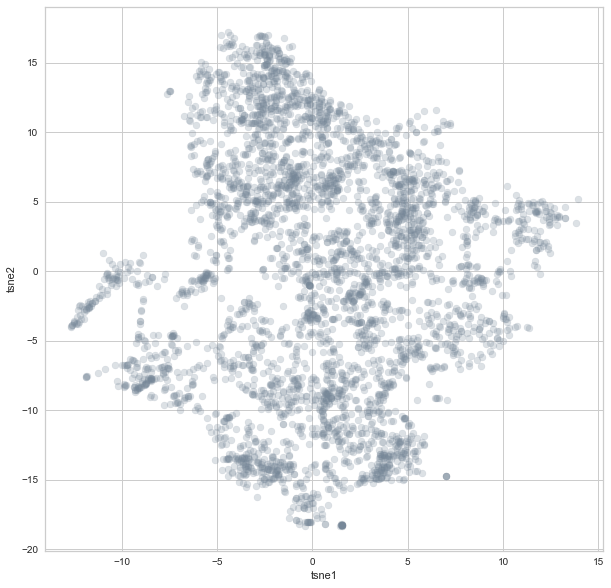

In [118]:
# Using TSNE to reduce dimension and visualise

tsne = TSNE(n_components=3, verbose=1, perplexity=60, n_iter=1000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(normalized_df)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

### Using silhouette method to compare with Elbow method

In [119]:
#Check that silhouette method matches with Elbow method in terms of accuracy

range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(tsne_df_scale)
    centers = clusterer.cluster_centers_

    score = silhouette_score(tsne_df_scale, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))


Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.3232274055480957)
For n_clusters = 3, silhouette score is 0.3833029866218567)
For n_clusters = 4, silhouette score is 0.4150824546813965)
For n_clusters = 5, silhouette score is 0.44268885254859924)
For n_clusters = 6, silhouette score is 0.44949212670326233)
For n_clusters = 7, silhouette score is 0.4242282211780548)
For n_clusters = 8, silhouette score is 0.4349014163017273)
For n_clusters = 9, silhouette score is 0.4257426857948303)


Text(0, 0.5, 'Inertia')

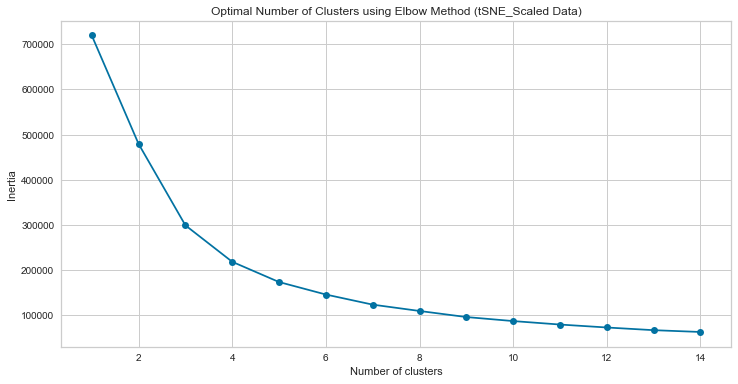

In [120]:
#Use Elbow Method to select optimal number of clusters based on TSNE results

sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(tsne_df_scale)
    sse.append([k, km.inertia_])
    
tsne_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (tSNE_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [121]:
kmeans_tsne_scale = KMeans(n_clusters=5, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)


KMeans tSNE Scaled Silhouette Score: 0.44268476963043213


In [122]:
clusters_tsne_scale.head()

tsne1  tsne2  tsne3  tsne_clusters
0 -4.212 -4.009 11.952              4
1 -4.472 -3.844 11.151              4
2  3.020 -3.426  2.252              2
3  0.867 -9.462 -3.897              0
4  5.225 -5.140  0.184              2

### TSNE + Kmeans Plot

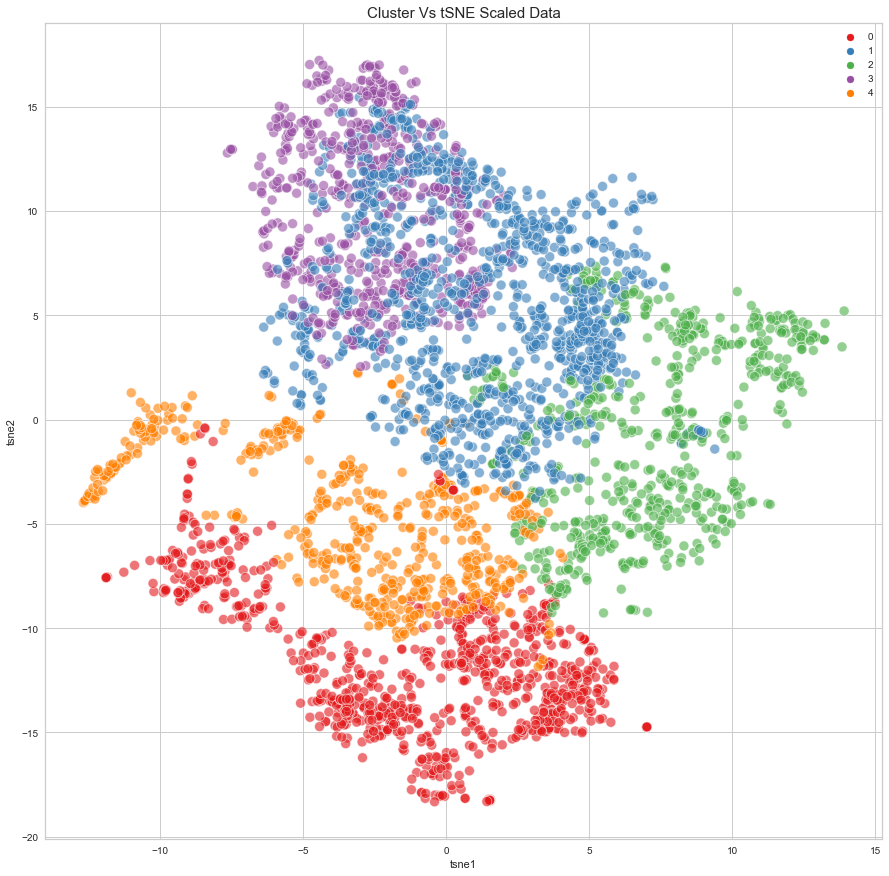

In [123]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],hue=labels_tsne_scale, palette='Set1', s=100, alpha=0.6).set_title('Cluster Vs tSNE Scaled Data', fontsize=15)
plt.legend()
plt.show()
#clusters_tsne_scale.to_csv("/Users/oluwatadeadekola/Downloads/Kmeans_Output.csv")


In [100]:
combine_all = pd.concat([df, clusters_tsne_scale], axis=1)
combine_all.to_csv("Kmeans_Output.csv")
combine_all.head()

Unnamed: 0  LoanNr_ChkDgt                           Name          City  \
0           0     1000014003                 ABC HOBBYCRAFT    EVANSVILLE   
1           1     1000024006    LANDMARK BAR & GRILLE (THE)     NEW PARIS   
2           2     1000034009          WHITLOCK DDS, TODD M.   BLOOMINGTON   
3           3     1000044001  BIG BUCKS PAWN & JEWELRY, LLC  BROKEN ARROW   
4           4     1000054004    ANASTASIA CONFECTIONS, INC.       ORLANDO   

  State    Zip                           Bank BankState   NAICS ApprovalDate  \
0    IN  47711               FIFTH THIRD BANK        OH  451120    28-Feb-97   
1    IN  46526                1ST SOURCE BANK        IN  722410    28-Feb-97   
2    IN  47401        GRANT COUNTY STATE BANK        IN  621210    28-Feb-97   
3    OK  74012  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97   
4    FL  32801        FLORIDA BUS. DEVEL CORP        FL       0    28-Feb-97   

   ...  DisbursementGross  BalanceGross  MIS_Status  ChgOffPrinGr     GrAppv  \
0  ...          60000.000         0.000       P I F         0.000  60000.000   
1  ...          40000.000         0.000       P I F         0.000  40000.000   
2  ...         287000.000         0.000       P I F         0.000 287000.000   
3  ...          35000.000         0.000       P I F         0.000  35000.000   
4  ...         229000.000         0.000       P I F         0.000 229000.000   

    SBA_Appv   tsne1   tsne2  tsne3 tsne_clusters  
0  48000.000 -13.023  -0.414 -1.870             4  
1  32000.000 -12.405   0.191 -1.744             4  
2 215250.000  -1.509  -2.776  3.358             3  
3  28000.000   1.005  -0.429 11.312             1  
4 229000.000   5.147 -10.069 -1.326             3  

[5 rows x 32 columns]

In [79]:
#combine_all.to_csv("/Users/oluwatadeadekola/Downloads/Kmeans_Output.csv")


In [80]:
combine_all[combine_all['tsne_clusters']==1].head()

Unnamed: 0  LoanNr_ChkDgt                            Name           City  \
3            3     1000044001   BIG BUCKS PAWN & JEWELRY, LLC   BROKEN ARROW   
11          11     1000144007  PROFESSIONAL ELEVATOR SERVICES        CHICAGO   
16          16     1000254005  ARK MAMAGEMENT ENTERPRISES INC        MIDLAND   
17          17     1000264008      FAIRFAX COURT SUBWAY, INC.    CENTREVILLE   
21          21     1000344008  YOUNG ACHIEVERS PRESCHOOL, INC  CORAL SPRINGS   

   State    Zip                           Bank BankState   NAICS ApprovalDate  \
3     OK  74012  1ST NATL BK & TR CO OF BROKEN        OK       0    28-Feb-97   
11    IL  60605     BANK OF AMERICA NATL ASSOC        OR  235950    28-Feb-97   
16    TX  79701    WELLS FARGO BANK NATL ASSOC        TX       0    28-Feb-97   
17    VA  20120     BANK OF AMERICA NATL ASSOC        MD       0    28-Feb-97   
21    FL  33065                    BANESCO USA        FL  624410    28-Feb-97   

    ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  \
3         1997    60      2     1.000          0            0              1   
11        1997    60     24     1.000          0            0              1   
16        1997    60      5     1.000          0            0              1   
17        1997    60     16     1.000          0            0              1   
21        1997    87      2     1.000          0            0              1   

    UrbanRural RevLineCr LowDoc ChgOffDate DisbursementDate  \
3            0         N      Y        NaN        30-Jun-97   
11           0         N      N        NaN        30-Nov-97   
16           0         N      Y        NaN        30-Jun-97   
17           0         N      Y        NaN        31-Jul-97   
21           0         N      N        NaN        31-Aug-97   

    DisbursementGross  BalanceGross MIS_Status  ChgOffPrinGr     GrAppv  \
3           35000.000         0.000      P I F         0.000  35000.000   
11         150000.000         0.000      P I F         0.000 300000.000   
16          70000.000         0.000      P I F         0.000  70000.000   
17         100000.000         0.000      P I F         0.000 100000.000   
21          70000.000         0.000      P I F         0.000  70000.000   

     SBA_Appv  tsne1  tsne2  tsne3  tsne_clusters  
3   28000.000  1.005 -0.429 11.312              1  
11 225000.000  1.230 -3.757 10.091              1  
16  56000.000  0.830 -0.181 11.102              1  
17  80000.000  1.254 -2.484 15.492              1  
21  56000.000 -0.103  4.372 15.232              1

In [81]:
combine_all[combine_all['tsne_clusters']==1].describe()

Unnamed: 0  LoanNr_ChkDgt       Zip      NAICS  ApprovalFY    Term  \
count     914.000        914.000   914.000    914.000     914.000 914.000   
mean     1270.024 1008698246.723 48020.614 276244.280    1998.511  63.078   
std      1134.098    7448340.426 36571.642 267048.480       2.285  36.474   
min         3.000 1000044001.000     0.000      0.000    1997.000   0.000   
25%       361.250 1002737507.750 10594.000      0.000    1997.000  36.000   
50%       813.500 1005730006.000 48161.000 311812.000    1997.000  60.000   
75%      2007.500 1013621508.250 90013.000 485320.000    2000.750  84.000   
max      3977.000 1026984010.000 99709.000 928120.000    2006.000 180.000   

        NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
count 914.000   914.000    914.000      914.000        914.000     914.000   
mean    8.507     0.967      0.004        0.025        166.842       0.038   
std    12.609     0.178      0.094        0.417       1701.554       0.233   
min     1.000     0.000      0.000        0.000          1.000       0.000   
25%     2.000     1.000      0.000        0.000          1.000       0.000   
50%     4.000     1.000      0.000        0.000          1.000       0.000   
75%    10.000     1.000      0.000        0.000          1.000       0.000   
max   155.000     1.000      2.000        9.000      21780.000       2.000   

       DisbursementGross  BalanceGross  ChgOffPrinGr     GrAppv   SBA_Appv  \
count            914.000       914.000       914.000    914.000    914.000   
mean           79978.046         0.000      3939.467  77679.425  50729.558   
std            71429.769         0.000     16420.585  67597.704  50828.279   
min                0.000         0.000         0.000   5000.000   2500.000   
25%            30000.000         0.000         0.000  30000.000  16970.000   
50%            54626.500         0.000         0.000  50650.000  37500.000   
75%           100000.000         0.000         0.000 100000.000  60000.000   
max           500000.000         0.000    150000.000 500000.000 375000.000   

        tsne1   tsne2   tsne3  tsne_clusters  
count 914.000 914.000 914.000        914.000  
mean   -1.261   1.593  12.851          1.000  
std     3.771   4.834   3.617          0.000  
min    -9.423  -6.715   1.430          1.000  
25%    -4.126  -2.497  10.116          1.000  
50%    -1.265   0.228  12.586          1.000  
75%     1.591   5.286  16.023          1.000  
max     6.888  12.650  20.432          1.000

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'LoanNr_ChkDgt'}>,
        <AxesSubplot:title={'center':'Zip'}>,
        <AxesSubplot:title={'center':'NAICS'}>,
        <AxesSubplot:title={'center':'ApprovalFY'}>],
       [<AxesSubplot:title={'center':'Term'}>,
        <AxesSubplot:title={'center':'NoEmp'}>,
        <AxesSubplot:title={'center':'NewExist'}>,
        <AxesSubplot:title={'center':'CreateJob'}>,
        <AxesSubplot:title={'center':'RetainedJob'}>],
       [<AxesSubplot:title={'center':'FranchiseCode'}>,
        <AxesSubplot:title={'center':'UrbanRural'}>,
        <AxesSubplot:title={'center':'DisbursementGross'}>,
        <AxesSubplot:title={'center':'BalanceGross'}>,
        <AxesSubplot:title={'center':'ChgOffPrinGr'}>],
       [<AxesSubplot:title={'center':'GrAppv'}>,
        <AxesSubplot:title={'center':'SBA_Appv'}>,
        <AxesSubplot:title={'center':'tsne1'}>,
        <AxesSubplot:title={'center':'tsne2'}>,
        <AxesS

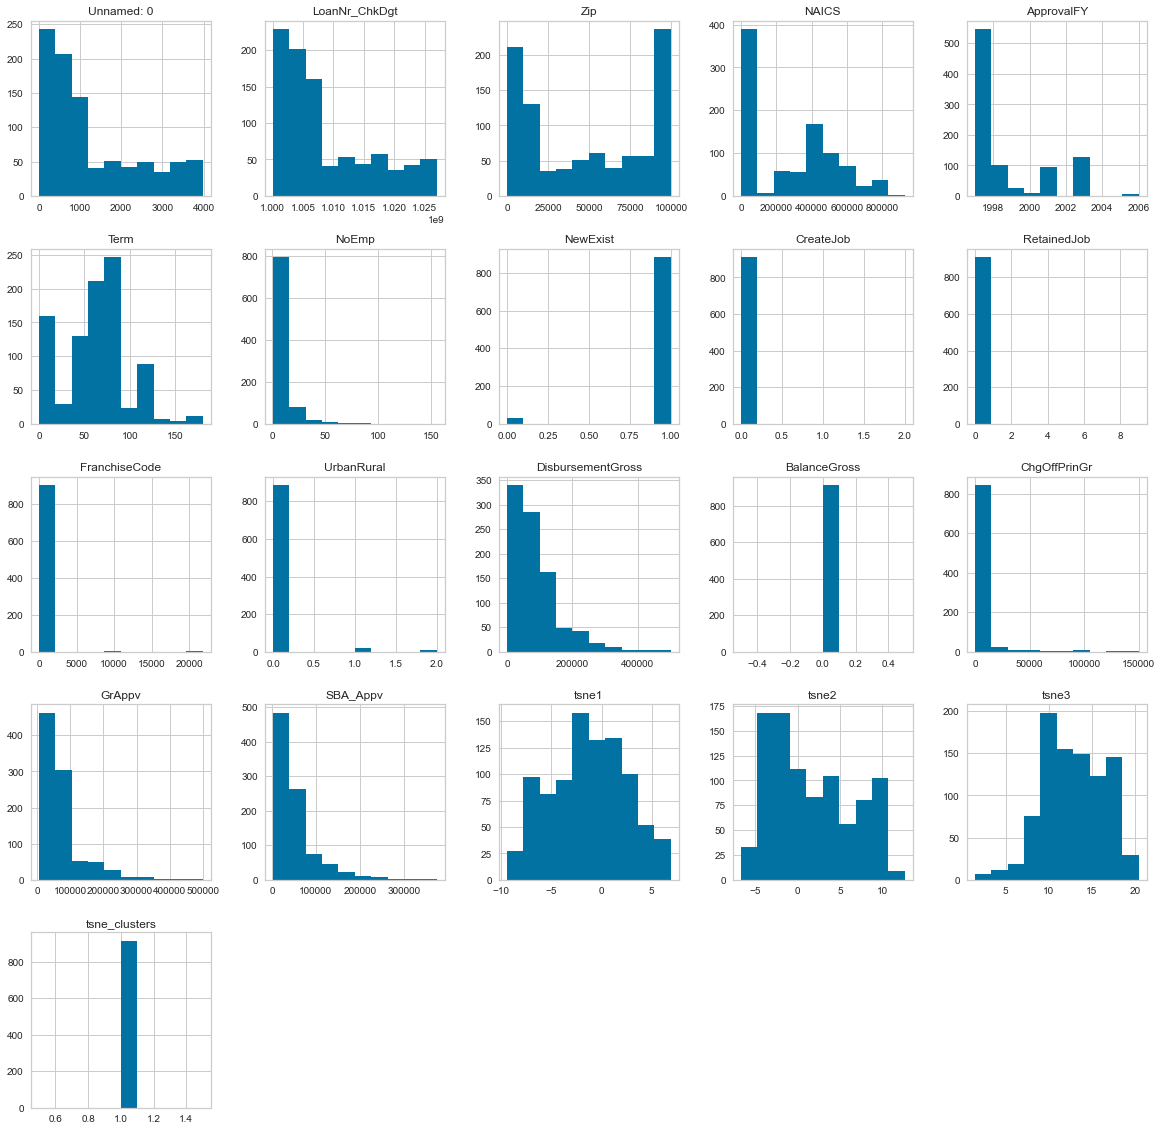

In [82]:
combine_all[combine_all['tsne_clusters']==1].hist(figsize=(20,20))

In [83]:
combine_all[combine_all['tsne_clusters']==2].head()

Unnamed: 0  LoanNr_ChkDgt                         Name         City State  \
24          24     1000446006                       SUBWAY  LITTLE ROCK    AR   
30          30     1000516003  CHICAGO BRICK UNLIMITED INC        MIAMI    FL   
32          32     1000526006                    RZI, INC.  NEW ORLEANS    LA   
34          34     1000536009       HUTMACHER HOLDINGS INC      LEANDER    TX   
38          38     1000576010      CORBIN CREEK GREENHOUSE  SPRINGFIELD    TN   

      Zip                            Bank BankState   NAICS ApprovalDate  \
24  72223                        HOPE FCU        MS  722211     7-Feb-06   
30  33186                  CITIBANK, N.A.        FL  238140     7-Feb-06   
32  70130  BUSINESS RES. CAP. SPECIALTY B        LA  532490     7-Feb-06   
34  78641     WELLS FARGO BANK NATL ASSOC        SD  541611     7-Feb-06   
38  37172                       BBCN BANK        CA  453110     7-Feb-06   

    ApprovalFY  Term  NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  \
24        2006   126      7     1.000          0            0              1   
30        2006    84      4     1.000          0            4              1   
32        2006    60      3     1.000          0            0              1   
34        2006    80      2     1.000          4            6              1   
38        2006    84      4     1.000          1            4              1   

    UrbanRural RevLineCr LowDoc ChgOffDate DisbursementDate  \
24           1         N      N        NaN        30-Apr-06   
30           1         Y      N        NaN        28-Feb-06   
32           1         N      N        NaN        31-May-06   
34           2         Y      N        NaN        31-May-06   
38           1         0      N        NaN        28-Feb-06   

    DisbursementGross  BalanceGross MIS_Status  ChgOffPrinGr     GrAppv  \
24         137300.000         0.000      P I F         0.000 137300.000   
30          51440.000         0.000      P I F         0.000  35000.000   
32          50000.000         0.000      P I F         0.000  50000.000   
34          63076.000         0.000      P I F         0.000  25000.000   
38          20000.000         0.000      P I F         0.000  20000.000   

     SBA_Appv  tsne1  tsne2  tsne3  tsne_clusters  
24 116705.000  5.579  7.008 -3.337              2  
30  17500.000  4.494  7.266 -1.673              2  
32  42500.000  4.920  7.362 -3.559              2  
34  12500.000  3.322  5.803 -2.759              2  
38  17000.000  4.329  7.375 -1.853              2

In [84]:
combine_all[combine_all['tsne_clusters']==2].describe()

Unnamed: 0  LoanNr_ChkDgt       Zip      NAICS  ApprovalFY     Term  \
count    1184.000       1184.000  1184.000   1184.000    1184.000 1184.000   
mean     2492.671 1016688581.101 45028.090 500116.438    2004.275   65.182   
std       949.504    6264881.674 28469.748 158161.179       1.002   28.259   
min        24.000 1000446006.000  1013.000      0.000    1997.000    0.000   
25%      1803.750 1012035757.250 28224.500 423990.000    2004.000   47.000   
50%      2545.500 1016870008.000 33701.000 512110.000    2004.000   83.000   
75%      3282.750 1021690001.000 75106.750 561730.000    2004.000   84.000   
max      3998.000 1027165009.000 99835.000 813910.000    2006.000  300.000   

         NoEmp  NewExist  CreateJob  RetainedJob  FranchiseCode  UrbanRural  \
count 1184.000  1184.000   1184.000     1184.000       1184.000    1184.000   
mean     9.099     0.999      0.141        0.701         71.347       1.241   
std     60.242     0.029      0.727        2.196        974.011       0.439   
min      1.000     0.000      0.000        0.000          1.000       0.000   
25%      2.000     1.000      0.000        0.000          1.000       1.000   
50%      4.000     1.000      0.000        0.000          1.000       1.000   
75%      7.000     1.000      0.000        0.000          1.000       1.000   
max   2000.000     1.000     11.000       18.000      20550.000       2.000   

       DisbursementGross  BalanceGross  ChgOffPrinGr     GrAppv   SBA_Appv  \
count           1184.000      1184.000      1184.000   1184.000   1184.000   
mean           76521.571         0.000      8810.737  58885.330  31787.447   
std            84964.535         0.000     18466.404  57080.983  36118.524   
min              300.000         0.000         0.000   3000.000   1500.000   
25%            26145.500         0.000         0.000  25000.000  12500.000   
50%            50000.000         0.000         0.000  50000.000  25000.000   
75%            97061.500         0.000      6353.750  72875.000  37500.000   
max          1035207.000         0.000    104496.000 450000.000 360000.000   

         tsne1    tsne2    tsne3  tsne_clusters  
count 1184.000 1184.000 1184.000       1184.000  
mean    11.569    2.757   -1.691          2.000  
std      4.594    2.691    4.929          0.000  
min      2.013   -3.417  -12.381          2.000  
25%      7.718    0.794   -4.724          2.000  
50%     11.988    2.692   -1.221          2.000  
75%     15.267    4.716    1.754          2.000  
max     21.405   10.319    7.280          2.000

In [85]:
df.columns

Index(['Unnamed: 0', 'LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank',
       'BankState', 'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp',
       'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural',
       'RevLineCr', 'LowDoc', 'ChgOffDate', 'DisbursementDate',
       'DisbursementGross', 'BalanceGross', 'MIS_Status', 'ChgOffPrinGr',
       'GrAppv', 'SBA_Appv'],
      dtype='object')

In [86]:
df.shape

(4000, 28)

### Building An Anomaly Detection Model for the Loan dataset

In [87]:
#General stats of df_A training features
df_tr_features = df[['LoanNr_ChkDgt', 'BalanceGross', 
                    'DisbursementGross', 'GrAppv', 
                     'SBA_Appv']]
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_tr_features.describe()

LoanNr_ChkDgt  BalanceGross  DisbursementGross      GrAppv    SBA_Appv
count       4000.000      4000.000           4000.000    4000.000    4000.000
mean  1013464058.281         0.000         136322.098  128445.825   90918.746
std      7590365.823         0.000         223941.092  216759.707  169559.291
min   1000014003.000         0.000              0.000    3000.000    1500.000
25%   1006922753.000         0.000          30000.000   25000.000   14250.000
50%   1013534005.000         0.000          63124.000   50000.000   31650.000
75%   1019697255.250         0.000         140000.000  121025.000   80000.000
max   1027175001.000         0.000        3599911.000 2500000.000 2000000.000

In [88]:
df_tr_features_train = df_tr_features.iloc[:3000,:]
df_tr_features_test = df_tr_features.iloc[3001:,:]
print('Data for Modeling: ' + str(df_tr_features_train.shape))
print('Unseen Data For Predictions: ' + str(df_tr_features_test.shape))

Data for Modeling: (3000, 5)
Unseen Data For Predictions: (999, 5)


In [89]:
from pycaret.utils import version
from pycaret.anomaly import *
exp_ano = setup(df_tr_features, normalize = True)

### Creating a model


In [90]:
## creating a model
iforest=create_model('iforest', contamination=0.05)
print (iforest)

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=7951, verbose=0)


### Model Evaluation


In [91]:
#evaluate a model
evaluate_model(iforest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Anomaly TSnE (3d)', 'tsn…

In [92]:
iforest_predictions = predict_model(iforest, data = df_tr_features)


In [93]:
iforest_predictions

LoanNr_ChkDgt  BalanceGross  DisbursementGross     GrAppv   SBA_Appv  \
0        1000014003         0.000          60000.000  60000.000  48000.000   
1        1000024006         0.000          40000.000  40000.000  32000.000   
2        1000034009         0.000         287000.000 287000.000 215250.000   
3        1000044001         0.000          35000.000  35000.000  28000.000   
4        1000054004         0.000         229000.000 229000.000 229000.000   
...             ...           ...                ...        ...        ...   
3995     1027134004         0.000         600000.000 600000.000 450000.000   
3996     1027154010         0.000         369000.000 369000.000 276750.000   
3997     1027155006         0.000          59809.000  30000.000  15000.000   
3998     1027165009         0.000          57000.000  50000.000  25000.000   
3999     1027175001         0.000         116000.000 116000.000  58000.000   

      Anomaly  Anomaly_Score  
0           0         -0.117  
1           0         -0.122  
2           0         -0.028  
3           0         -0.126  
4           0         -0.031  
...       ...            ...  
3995        1          0.055  
3996        1          0.009  
3997        0         -0.116  
3998        0         -0.148  
3999        0         -0.104  

[4000 rows x 7 columns]

In [94]:
(iforest_predictions['Anomaly'] == 1).sum()

200

In [95]:
iforest_predictions[iforest_predictions['Anomaly'] == 1].head(10)

LoanNr_ChkDgt  BalanceGross  DisbursementGross      GrAppv    SBA_Appv  \
5      1000084002         0.000         517000.000  517000.000  387750.000   
6      1000093009         0.000         600000.000  600000.000  499998.000   
13     1000154010         0.000         370000.000  370000.000  277500.000   
15     1000244002         0.000         350000.000  350000.000  262500.000   
20     1000324002         0.000         615000.000  615000.000  461250.000   
23     1000434000         0.000        1250000.000 1250000.000  937500.000   
31     1000524003         0.000         600000.000  600000.000  450000.000   
58     1000726007         0.000        1350000.000 1350000.000 1012500.000   
63     1000754002         0.000         745000.000  745000.000  558750.000   
71     1000786003         0.000        1524200.000 1535000.000 1151250.000   

    Anomaly  Anomaly_Score  
5         1          0.052  
6         1          0.053  
13        1          0.012  
15        1          0.009  
20        1          0.048  
23        1          0.161  
31        1          0.039  
58        1          0.174  
63        1          0.063  
71        1          0.181

In [96]:
plot_model(iforest, plot = 'umap')

### Test Model 

In [97]:
unseen_predictions = predict_model(iforest, data=df_tr_features_test)
unseen_predictions.head(10)

LoanNr_ChkDgt  BalanceGross  DisbursementGross     GrAppv   SBA_Appv  \
3001     1019705005         0.000          75000.000  75000.000  37500.000   
3002     1019706001         0.000          27376.000  27700.000  13850.000   
3003     1019714001         0.000          50000.000  50000.000  40000.000   
3004     1019716004         0.000         557000.000 557000.000 557000.000   
3005     1019725000         0.000           3393.000  40000.000  20000.000   
3006     1019734007         0.000         100000.000 100000.000  80000.000   
3007     1019735003         0.000         160409.000 100000.000  50000.000   
3008     1019745006         0.000          40000.000  40000.000  20000.000   
3009     1019746002         0.000         100000.000 100000.000  50000.000   
3010     1019755009         0.000          64575.000  50000.000  25000.000   

      Anomaly  Anomaly_Score  
3001        0         -0.197  
3002        0         -0.201  
3003        0         -0.197  
3004        1          0.011  
3005        0         -0.173  
3006        0         -0.188  
3007        0         -0.162  
3008        0         -0.205  
3009        0         -0.191  
3010        0         -0.216

### Model Deployment

Finally, model deployment can be done on any cloud platform like AWS, Azure 

Code syntax is:


***deploy_model(model = iforest, model_name = 'deploy_iforest', platform = 'aws', authentication = {'bucket' : 'pycaret-test'})***
